Alguns detalhes importantes
**Subúrbio** : Subúrbio

**Endereço** : Endereço

**Quartos** : Número de quartos

**Preço** : Preço em dólares australianos

**Método :**

S - imóvel vendido;

SP - imóvel vendido anteriormente;

PI - imóvel repassado;

VB - oferta de fornecedor;

SA - vendido após leilão;

**Tipo :**

h - casa, chalé, vila, semi, terraço;

u - unidade, duplex;

t - casa geminada;


**VendedorG** : Agente Imobiliário

**Data** : Data de venda

**Distância** : Distância do CBD em quilômetros

Nome da região: Região geral (Oeste, Noroeste, Norte, Nordeste...etc)

Propertycount : Número de propriedades que existem no subúrbio.

Banheiro : Número de Banheiros

Carro : Número de vagas

Tamanho do terreno : Tamanho do terreno em metros

CouncilArea : Conselho de administração para a área


## **Importando os dados:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


**Verificando se há dados nulos:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [5]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

**A coluna "Price" é o Target, como há alguns valores nulos vamos retira-los pois não irá fazer falta.**

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


**Convertendo a coluna "Date" para Datetime:**

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

df["Date"].head()

0   2017-01-04
1   2017-01-04
2   2017-01-04
3   2017-01-04
4   2017-01-04
Name: Date, dtype: datetime64[ns]

**Criando colunas apenas com mês e ano:**

In [9]:
df['mes'] = pd.DatetimeIndex(df["Date"]).month
df['ano'] = pd.DatetimeIndex(df["Date"]).year

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,mes,ano
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1,2017
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1,2017
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1,2017
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,1,2017
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,1,2017


**Vimos que na coluna "Address" há o número de cada imóvel, vamos retirar pois os valores não são impactantes para o resultado de predição.**

In [10]:
lista = []
for c in df["Address"]:
   lista.append(c.split(" ", 1)[1])
df["Address"] = lista

In [11]:
df["Address"]

0           Lithgow St
1            Turner St
2             Yarra St
3              Vida St
4        Clydesdale Rd
             ...      
63016        Petrie St
63017        Murray Rd
63018          Carr Pl
63019        Parker Ct
63020     Parkinson Wy
Name: Address, Length: 48433, dtype: object

## **Analisando estatísticamente o Target - Price**

### **Correlação:**

**Vemos abaixo nos dois gráficos que há correlações positivas altas e baixas e negativas de acordo com a correlação de Pearson.**

In [ ]:
df.corr()

,Rooms,Price,Postcode,Propertycount,Distance,mes,ano
Rooms,1.000000,0.417151,0.094949,-0.060872,0.284096,-0.002673,0.006298
Price,0.417151,1.000000,0.004162,-0.063827,-0.254647,-0.014676,0.020036
Postcode,0.094949,0.004162,1.000000,-0.001899,0.503128,0.006651,0.020390
Propertycount,-0.060872,-0.063827,-0.001899,1.000000,0.006422,0.003988,0.015412
Distance,0.284096,-0.254647,0.503128,0.006422,1.000000,0.012752,0.032984
mes,-0.002673,-0.014676,0.006651,0.003988,0.012752,1.000000,-0.212785
ano,0.006298,0.020036,0.020390,0.015412,0.032984,-0.212785,1.000000


**Correlação de Pearson:**

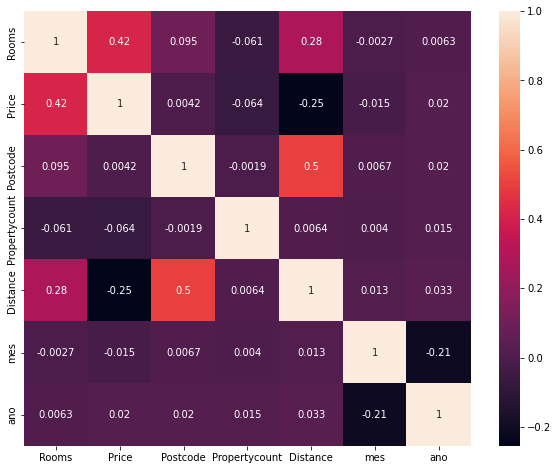

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

**Correlação de Spearman:**

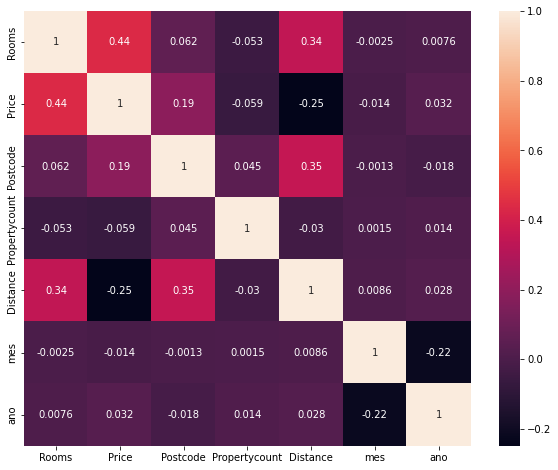

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr("spearman"), annot=True)

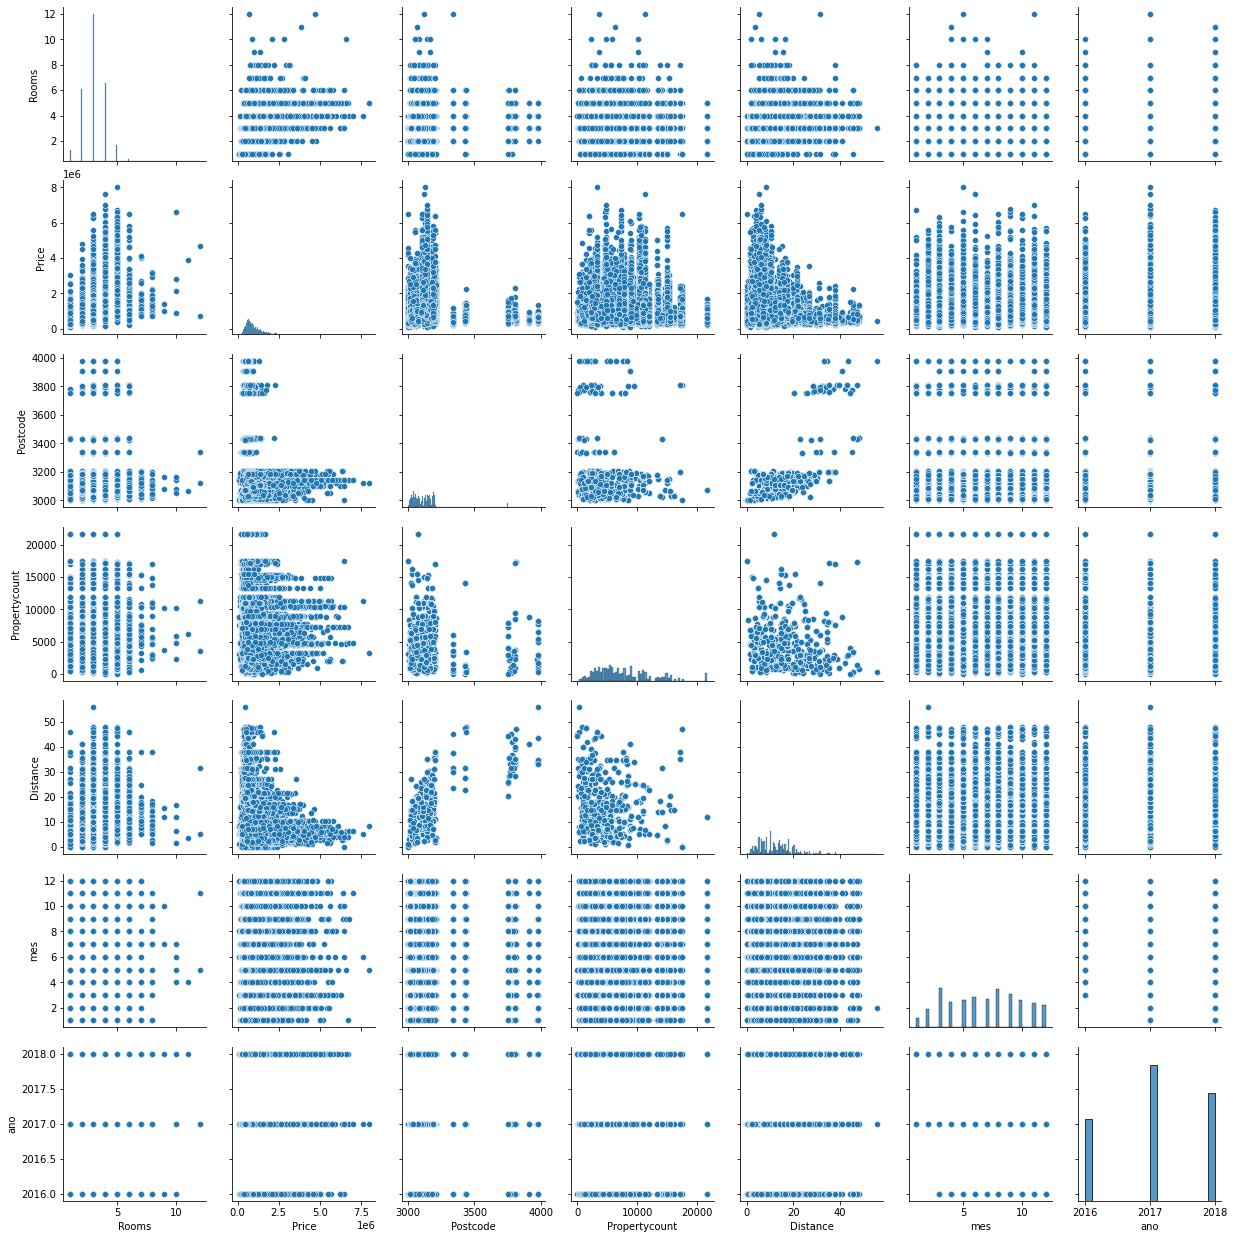

In [ ]:
sns.pairplot(df);

###**Intervalo de confiança - Média dos valores de aluguéis**

**Nível de confiança = 95%**

Iremos pegar 100 amostras aleatórias:

In [ ]:
import random
lista = []
for num in df["Price"]:
  lista.append(num)
dados = random.sample(lista,100)

Média amostral:

In [ ]:
media = pd.DataFrame(dados).mean()
media = media[0]
media

928389.99

Desvio padrão amostral:

In [ ]:
desvio_padrao = pd.DataFrame(dados).std()
desvio_padrao  = desvio_padrao[0]
desvio_padrao 

497631.13805653714

Número de amostras:

In [ ]:
n = len(dados)
n

100

In [ ]:
from scipy.stats import norm
from scipy import stats
import math

In [ ]:
stats.sem(dados)

49763.11380565372

In [ ]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(830856.0791823508, 1025923.9008176492)

In [ ]:
margem_erro = media - intervalos[0]
margem_erro

97533.91081764922

**Temos 95% de confiança que a média geral do valores dos imóveis estará entre  860.629,05 e 1.053.000,94 Dóllares Australianos com uma margem de erro de 96.185,94 para mais e para menos**

**De fato confirmamos abaixo que a média geral está dentro do intervalo:**

In [ ]:
df["Price"].mean()

999103.5044209618

### **Avaliando os quartis:**

In [ ]:

Q1 = df["Price"].quantile(q=0.25) # Primeiro quartil
Q2 = df["Price"].quantile(q=0.50) # Segundo quartil
Q3 = df["Price"].quantile(q=0.75) # Terceiro quartil

IQR = Q3 - Q1 # Intervalo interquartílico
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
media = df["Price"].mean()
mediana = df["Price"].median()
moda = df["Price"].value_counts().index[0]

print(f"Primeiro quartil: {Q1}")
print(f"Segundo quartil: {Q2}")
print(f"Terceiro quartil: {Q3}")
print(f"Intervalo interquartílico: {IQR}")
print(f"Limite superior: {sup}")
print(f"Limite inferior: {inf}")
print(f"Média geral: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda-Valor mais frequente: {moda:.2f}")


Primeiro quartil: 620000.0
Segundo quartil: 835000.0
Terceiro quartil: 1220000.0
Intervalo interquartílico: 600000.0
Limite superior: 2120000.0
Limite inferior: -280000.0
Média geral: 999103.50
Mediana: 835000.00
Moda-Valor mais frequente: 600000.00


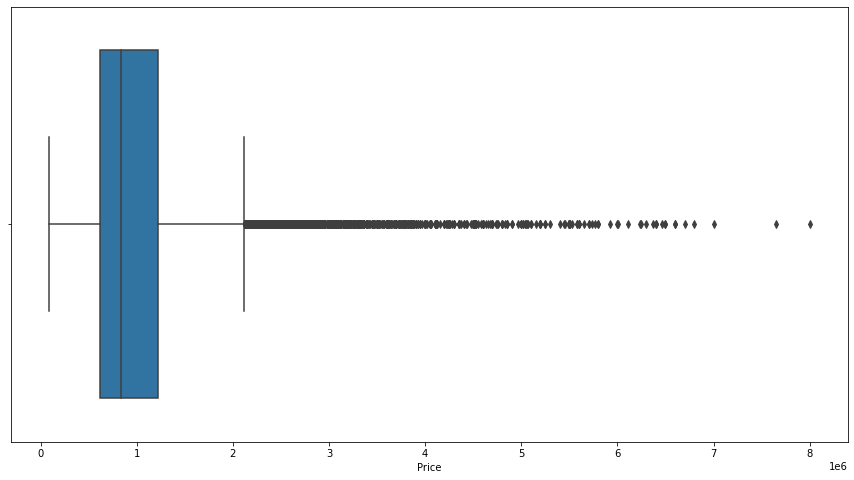

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df["Price"]);

### **Assimetria positiva =>  moda <= mediana <= média**

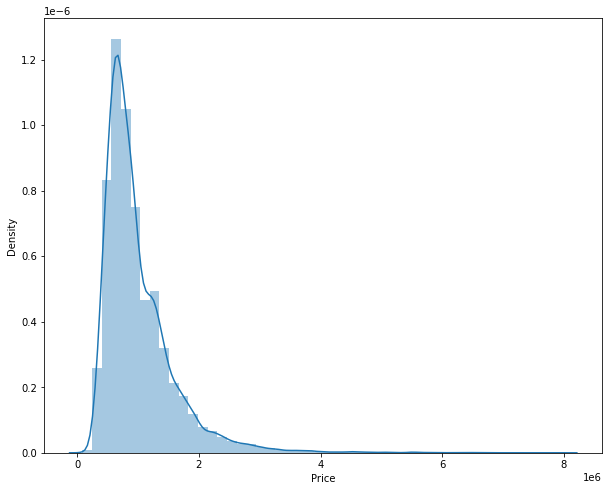

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df["Price"]);

### **Avaliando a medida de curtose:**

**Para valores abaixo de 0.263 => O resultado identificou como Leptocúrtica, mostrando que a maioria dos seus dados se dá em torno do seu centro:**

In [ ]:
Q10 = df["Price"].quantile(q=0.1) # Décimo quartil
Q90 = df["Price"].quantile(q=0.9) # Nonagésimo quartil
(Q3-Q1)/(2*(Q90-Q10))

0.24630541871921183

## **Médias e frequências de preços por região:**

**A Southern-Metropolitan é a região que tem mais imóveis caros da cidade, sua média de preços tambem é a maior e é uma das duas regiões mais próximas do centro. Vemos também que regiões mais próximas do centro são muito valorizadas.**

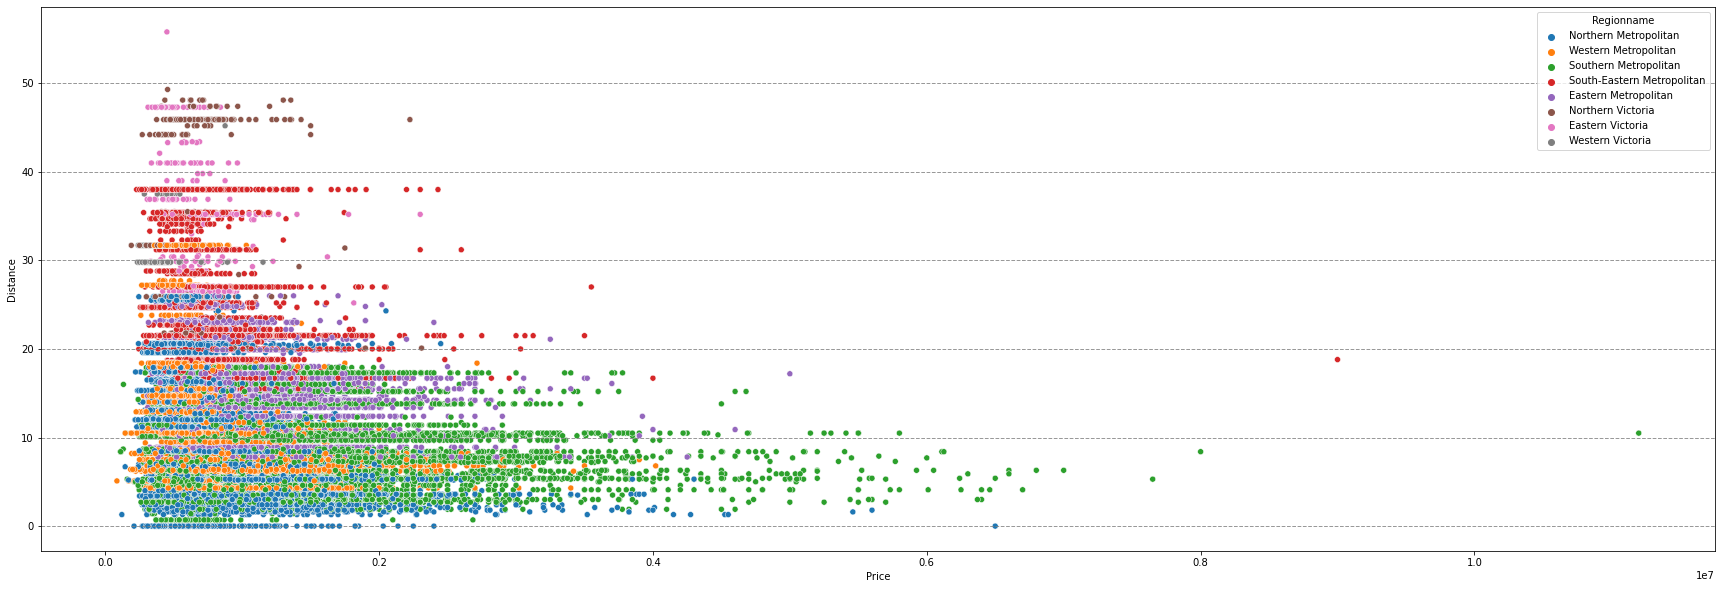

In [14]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=df, x=df["Price"], y="Distance", hue="Regionname")
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show();

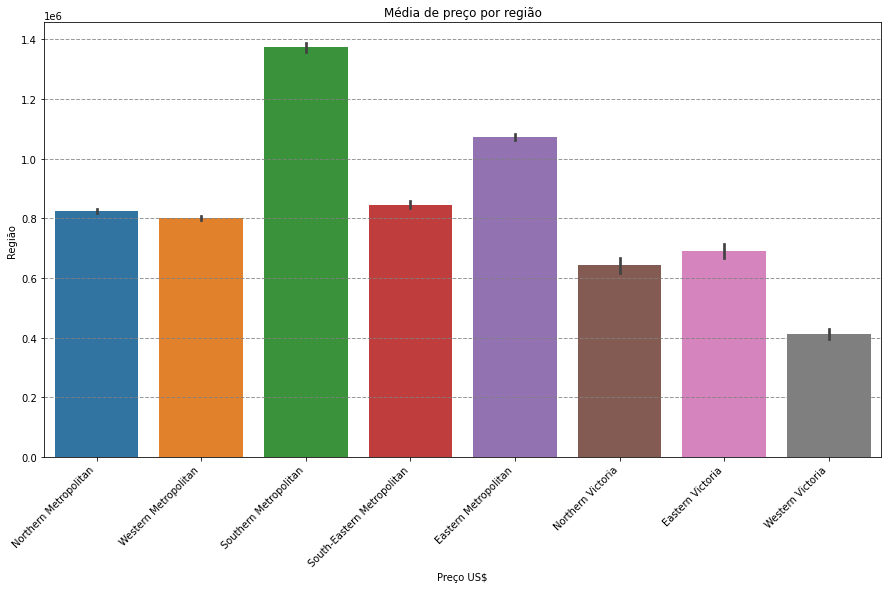

In [15]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, y="Price", x="Regionname")
plt.title("Média de preço por região")
plt.xlabel("Preço US$")
plt.ylabel("Região")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show(); 

**Média dos valores por região:**

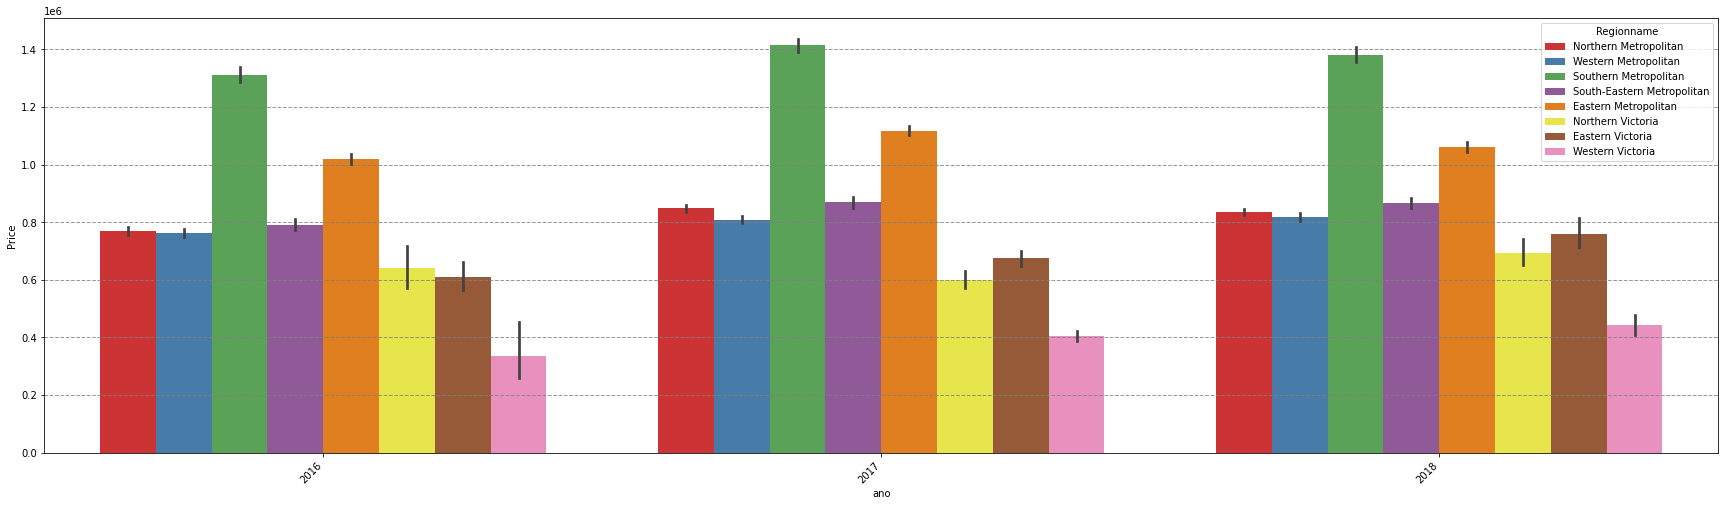

In [16]:
df_date_region = df[["mes", "ano", "Regionname", "Price"]]
df_date_region.sort_values(by="mes", ascending=False)
plt.figure(figsize=(30, 8))
sns.barplot(data=df_date_region, y="Price", x="ano", hue="Regionname", palette="Set1") # Dark2, Paired_r, Set1
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()

In [17]:
def grafico_regiao(regiao):
  lista_ano = []
  lista_media = []
  for i in sorted(df["ano"].unique()):
    if i not in lista_ano:
      lista_ano.append(i)
      regiao_ano = df[df["ano"] == i]
      media = regiao_ano[regiao_ano["Regionname"] == regiao]["Price"].mean()
      lista_media.append(media)

  return lista_media

In [18]:
date = sorted(df["ano"].unique())

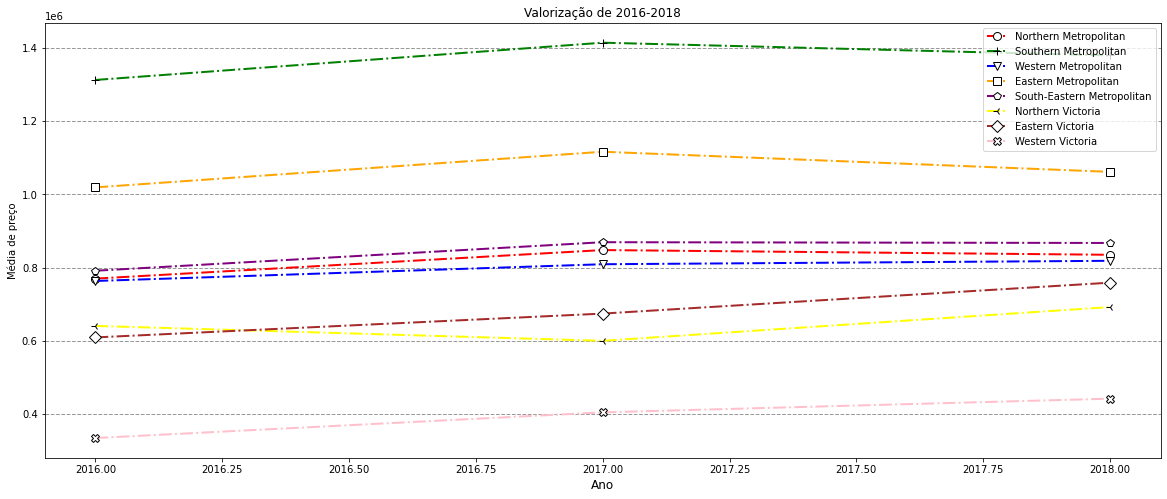

In [19]:
plt.figure(figsize=(20, 8))

plt.plot(date, grafico_regiao("Northern Metropolitan"), color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2) 
plt.plot(date, grafico_regiao("Southern Metropolitan"),color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(date, grafico_regiao("Western Metropolitan"),color="blue", marker="v", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(date, grafico_regiao("Eastern Metropolitan"),color="orange", marker="s", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(date, grafico_regiao("South-Eastern Metropolitan"),color="purple", marker="p", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(date, grafico_regiao("Northern Victoria"),color="yellow", marker="3", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(date, grafico_regiao("Eastern Victoria"),color="brown", marker="D", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(date, grafico_regiao("Western Victoria"),color="pink", marker="X", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)

# Rótulos
plt.title("Valorização de 2016-2018", loc="center")
plt.xlabel("Ano", color="black", size=12)
plt.ylabel("Média de preço")
plt.legend(["Northern Metropolitan", "Southern Metropolitan", "Western Metropolitan", "Eastern Metropolitan", "South-Eastern Metropolitan", "Northern Victoria", "Eastern Victoria", "Western Victoria"])

#Gridlines
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()

## **Qual a porcentagem dos valores dos imóveis por região?**

In [37]:
lista_val = []
lista_regiao = []
for m in df["Regionname"]:
  if m not in lista_val:
    lista_val.append(m)
    for i in lista_val:
      if i not in lista_regiao:
        lista_regiao.append(i)
        dif = grafico_regiao(i)[2] - grafico_regiao(i)[0]
        valorizacao = dif  / grafico_regiao(i)[2]*100
        print(f"Na {i} houve uma valorização de {valorizacao:.2f}% na média dos valores dos imóveis.")

Na Northern Metropolitan houve uma valorização de 7.80% na média dos valores dos imóveis.
Na Western Metropolitan houve uma valorização de 6.73% na média dos valores dos imóveis.
Na Southern Metropolitan houve uma valorização de 4.85% na média dos valores dos imóveis.
Na South-Eastern Metropolitan houve uma valorização de 8.75% na média dos valores dos imóveis.
Na Eastern Metropolitan houve uma valorização de 4.00% na média dos valores dos imóveis.
Na Northern Victoria houve uma valorização de 7.44% na média dos valores dos imóveis.
Na Eastern Victoria houve uma valorização de 19.71% na média dos valores dos imóveis.
Na Western Victoria houve uma valorização de 24.34% na média dos valores dos imóveis.


**A duas regiões que mais valorizaram, Eastern Victoria e Western Victoria são as regiões mais distantes do centro e com menor concentração de construções, na divisa com pequenas cidades da região metropolitana, uma possível explicação é que estejam na fase de vetorização de crescimento urbanístico/infraestruturas. Como qualquer cidade que não tem para onde crescer, Melbourne está inchando seus limites fazendo com que o setor de construção civil faça maiores investimentos nestas regiões.**

## **Quais os tipos de imóveis que tem as médias de preços mais caras por região?**


h - casa, chalé, vila, semi, terraço;

u - unidade, duplex;

t - casa geminada;

In [ ]:
df["Type"].value_counts()

h    29447
u     7989
t     4297
Name: Type, dtype: int64

**Vemos que os imóveis como casa, chalé, vila e terraço tem uma média de preço mais elevados no geral**

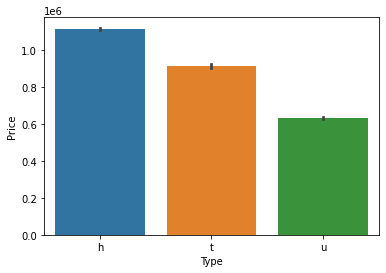

In [ ]:
sns.barplot(data=df, x="Type", y="Price");

**Média de preços por tipo separadas por regiões:**

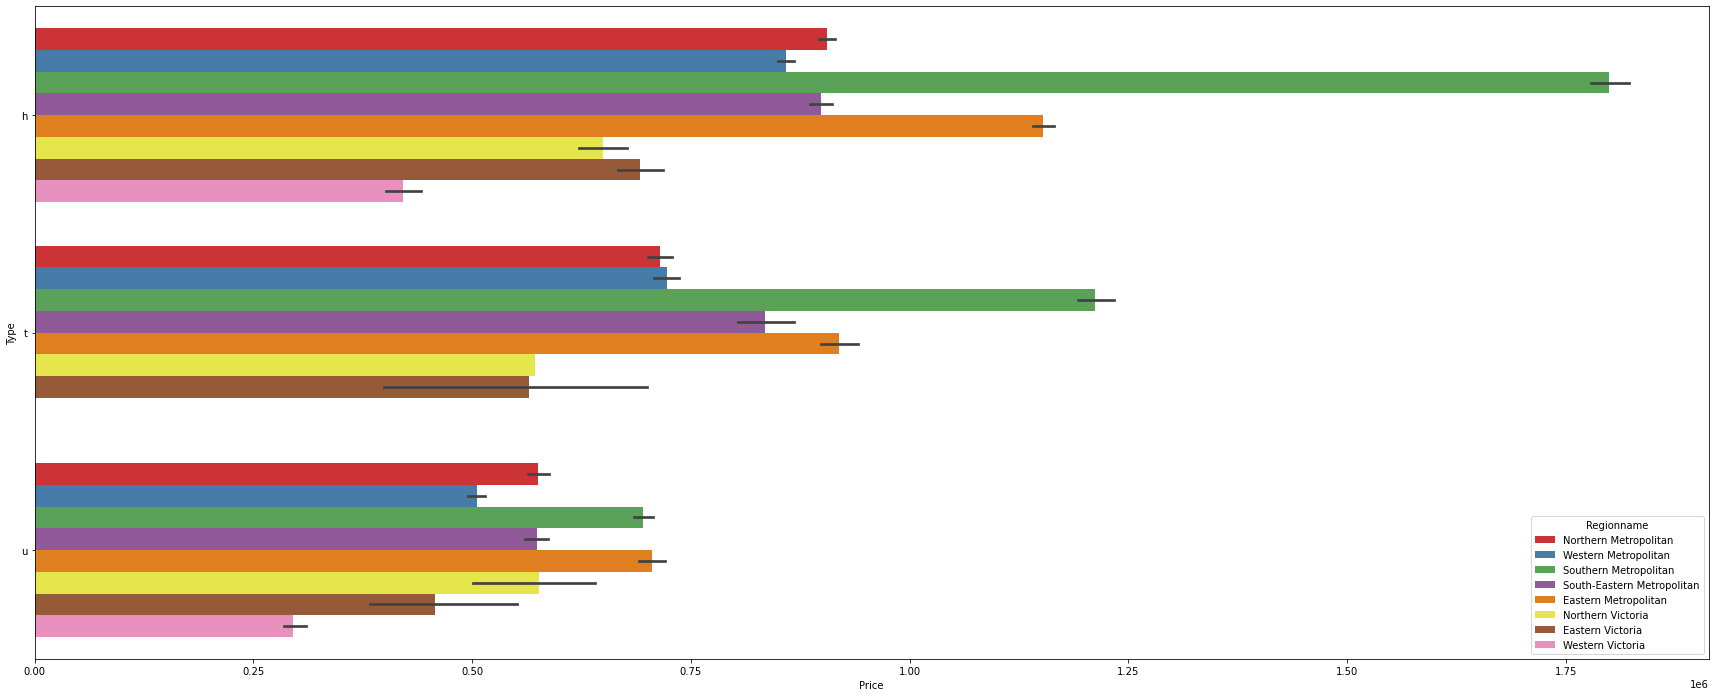

In [ ]:
plt.figure(figsize=(30,12))
sns.barplot(data=df, y="Type", x="Price", hue="Regionname", palette="Set1");

**Vamos destrinchar:**

In [ ]:
def tipos_regiao(regiao):
  dataset = df[df["Regionname"] == regiao]
  sns.barplot(data=dataset, x="Type", y="Price", palette="Set1");

**As casas, chalés, vilas e coberturas que são do tipo "h" tem as maiores médias em todas as regiões. Os imóveis do tipo "t" que são casas geminadas tem uma menor quantidade de imóveis em todas as regiões porém tem a maior média de preço que as do tipo "u" que são apartamentos e duplex. Vemos que em Melbourne os imóveis térreo tem uma média maior de preço do que os apartamentos, exceto as coberturas que algumas tem uma maior média de preço que outros tipos de apartamentos (mas esse fator é válido em qualquer parte do mundo).**

In [ ]:
df_nm = df[df["Regionname"] == "Northern Metropolitan"]
df_nm["Type"].value_counts()

h    8273
u    2186
t    1265
Name: Type, dtype: int64

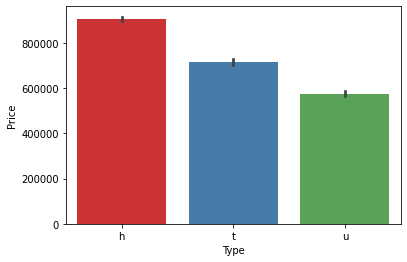

In [ ]:
tipos_regiao("Northern Metropolitan")

In [ ]:
df_nm = df[df["Regionname"] == "Southern Metropolitan"]
df_nm["Type"].value_counts()

h    5999
u    3439
t    1382
Name: Type, dtype: int64

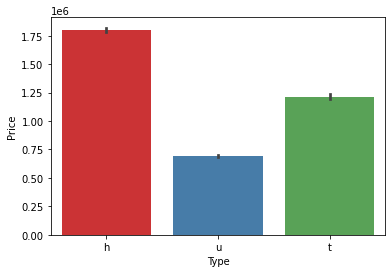

In [ ]:
tipos_regiao("Southern Metropolitan")

In [ ]:
df_nm = df[df["Regionname"] == "Western Metropolitan"]
df_nm["Type"].value_counts()

h    6631
u    1038
t     739
Name: Type, dtype: int64

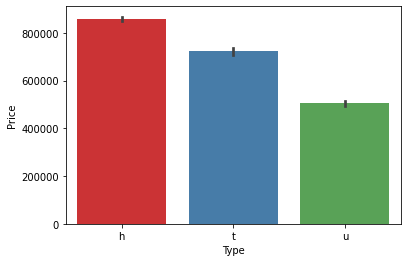

In [ ]:
tipos_regiao("Western Metropolitan")

In [ ]:
df_nm = df[df["Regionname"] == "Eastern Metropolitan"]
df_nm["Type"].value_counts()

h    5123
u     829
t     553
Name: Type, dtype: int64

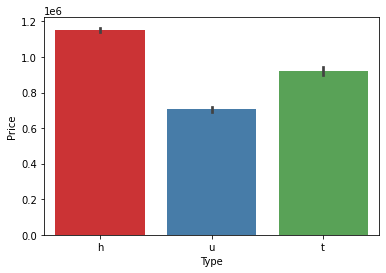

In [ ]:
tipos_regiao("Eastern Metropolitan")

In [ ]:
df_nm = df[df["Regionname"] == "South-Eastern Metropolitan"]
df_nm["Type"].value_counts()

h    2581
u     479
t     353
Name: Type, dtype: int64

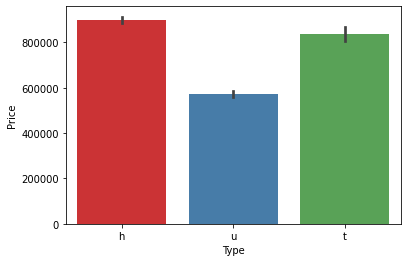

In [ ]:
tipos_regiao("South-Eastern Metropolitan")

In [ ]:
df_nm = df[df["Regionname"] == "Eastern Victoria"]
df_nm["Type"].value_counts()

h    319
u      6
t      4
Name: Type, dtype: int64

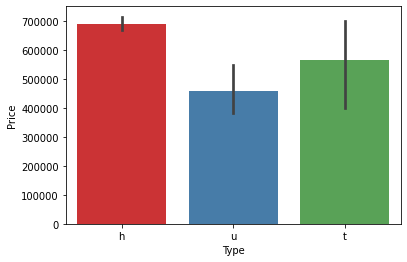

In [ ]:
tipos_regiao("Eastern Victoria")

##**O número de quartos influencia na média de preço por tipo de imóveis?**

h - casa, chalé, vila, semi, terraço;

u - unidade, duplex;

t - casa geminada;

**Nota-se que até 5 quartos a Feature influencia na média de preços em todos os tipos de imóveis, a partir de 6 quartos o preço não é um fator direto, pois imóveis com 6 ou mais quartos são consideradas mansões, o que inclui outros fatores não inclusos no dataset.**

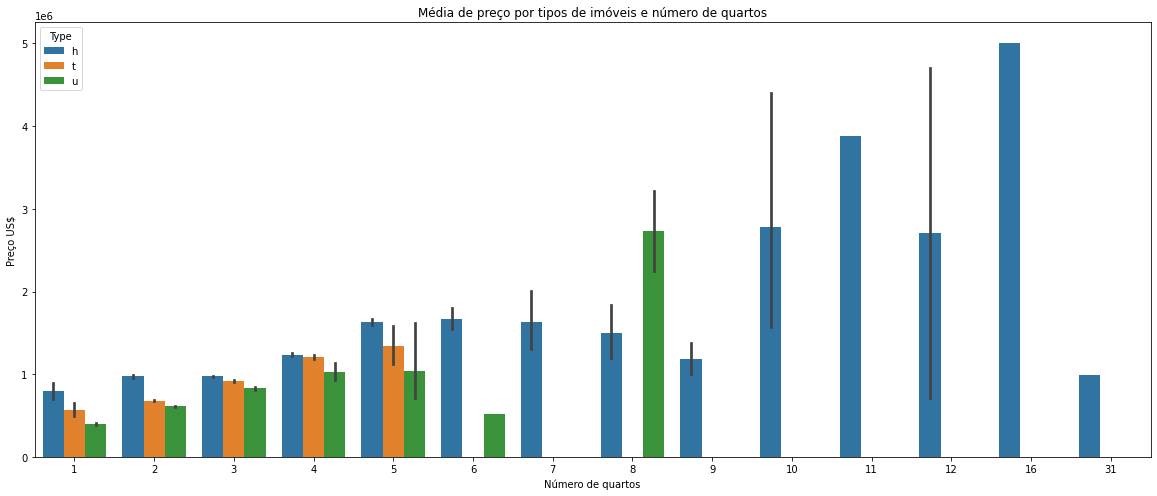

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x="Rooms", y="Price", hue="Type")
plt.title("Média de preço por tipos de imóveis e número de quartos")
plt.xlabel("Número de quartos")
plt.ylabel("Preço US$");

## **Vimos que a Southern-Metropolitan tem a média de preço mais caro dentre todas as regiões, qual o bairro da Southern-Metropolitan que tem a média de preço mais elevada?**

h - casa, chalé, vila, semi, terraço;

u - unidade, duplex;

t - casa geminada;

In [ ]:
df_sm = df[df["Regionname"] == "Southern Metropolitan"]
df_sm = pd.DataFrame(df_sm)
df_sm

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,mes,ano
9,Albert Park,Mills St,3,h,1925000.0,S,Cayzer,2017-01-04,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council,1,2017
17,Armadale,Ashleigh Rd,2,u,836000.0,S,Jellis,2017-01-04,3143,Southern Metropolitan,4836,6.3,Stonnington City Council,1,2017
18,Armadale,Auburn Gr,2,h,2110000.0,S,Jellis,2017-01-04,3143,Southern Metropolitan,4836,6.3,Stonnington City Council,1,2017
19,Armadale,High St,3,h,1386000.0,S,Marshall,2017-01-04,3143,Southern Metropolitan,4836,6.3,Stonnington City Council,1,2017
20,Armadale,Kooyong Rd,2,u,580000.0,VB,hockingstuart,2017-01-04,3143,Southern Metropolitan,4836,6.3,Stonnington City Council,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62923,Surrey Hills,Sunbury Cr,2,t,950000.0,VB,Jellis,2017-12-30,3127,Southern Metropolitan,5457,10.2,Boroondara City Council,12,2017
62951,Toorak,Cross St,5,h,4515000.0,PI,Kay,2017-12-30,3142,Southern Metropolitan,7217,4.1,Stonnington City Council,12,2017
62952,Toorak,Lambert Rd,3,t,1310000.0,S,hockingstuart,2017-12-30,3142,Southern Metropolitan,7217,4.1,Stonnington City Council,12,2017
62953,Toorak,Orrong Rd,3,u,1550000.0,VB,Marshall,2017-12-30,3142,Southern Metropolitan,7217,4.1,Stonnington City Council,12,2017


In [ ]:
df_sm = df_sm.groupby(by=["Suburb", "Type"])["Price"].value_counts()
df_sm = pd.DataFrame(df_sm)
df_sm = df_sm.rename(columns={"Price": "Total"})
df_sm = df_sm.reset_index()
df_sm = df_sm.groupby(by=["Suburb"])["Price"].mean()
df_sm = pd.DataFrame(df_sm)
df_sm = df_sm.rename(columns={"Price": "Média"}).reset_index()
df_sm = df_sm.sort_values(by="Média", ascending=False)
df_sm

,Suburb,Média
43,Middle Park,2.268946e+06
15,Canterbury,2.266505e+06
23,Deepdene,2.061593e+06
40,Malvern,1.994414e+06
11,Brighton,1.956699e+06
...,...,...
4,Balaclava,8.186389e+05
28,Glen Huntly,7.439960e+05
52,Ripponlea,7.413333e+05
24,Docklands,6.954444e+05


**Ranking dos bairros mais caros da Southern Metropolitan pela média de preço:**

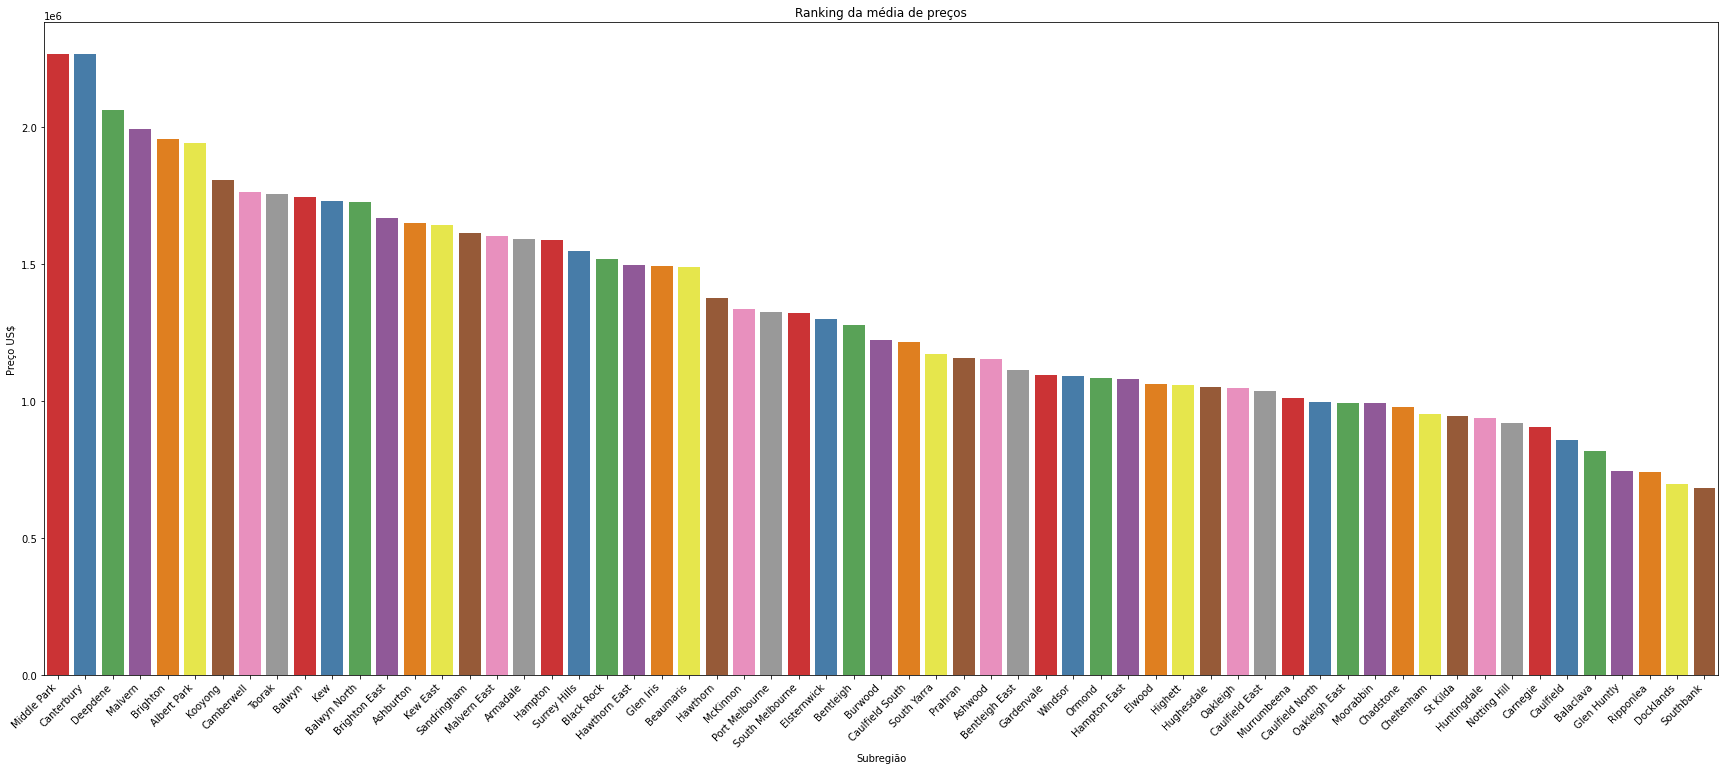

In [ ]:
plt.figure(figsize=(30,12))
sns.barplot(data=df_sm, x="Suburb", y="Média", palette="Set1")
plt.title("Ranking da média de preços")
plt.xlabel("Subregião")
plt.ylabel("Preço US$")
plt.xticks(rotation=45, ha="right");

In [ ]:
df_sm_t = df_sm.groupby(by=["Suburb", "Type"])["Price"].value_counts()
df_sm_t = pd.DataFrame(df_sm_t)
df_sm_t = df_sm_t.rename(columns={"Price": "qtde"})
df_sm_t = df_sm_t.reset_index()
df_sm_t = df_sm_t.groupby(by=["Suburb", "Type"])["Price"].mean()
df_sm_t = pd.DataFrame(df_sm_t)
df_sm_t = df_sm_t.rename(columns={"Price": "Média"}).reset_index()
df_sm_t = df_sm_t.sort_values(by="Média", ascending=False)
df_sm_t 

,Suburb,Type,Média
174,Toorak,h,3.430586e+06
45,Canterbury,h,2.865913e+06
118,Malvern,h,2.803413e+06
3,Armadale,h,2.656318e+06
127,Middle Park,h,2.632644e+06
...,...,...,...
156,Ripponlea,u,5.326923e+05
53,Caulfield,u,4.992083e+05
108,Huntingdale,u,4.746429e+05
56,Caulfield East,u,4.316000e+05


**Analisando os bairros com os tipos de imóveis:**

**Notamos acima que os Middle Park e Canterbury são os bairros mais caros da Southern Metropolitan. Observamos abaixo que ele não contém imóveis do tipo "u" que é o grupo com imóveis mais baratos em todas as regiões. O fato de não conter esses imóveis talvez tenha contribuído para o aumento da média.**

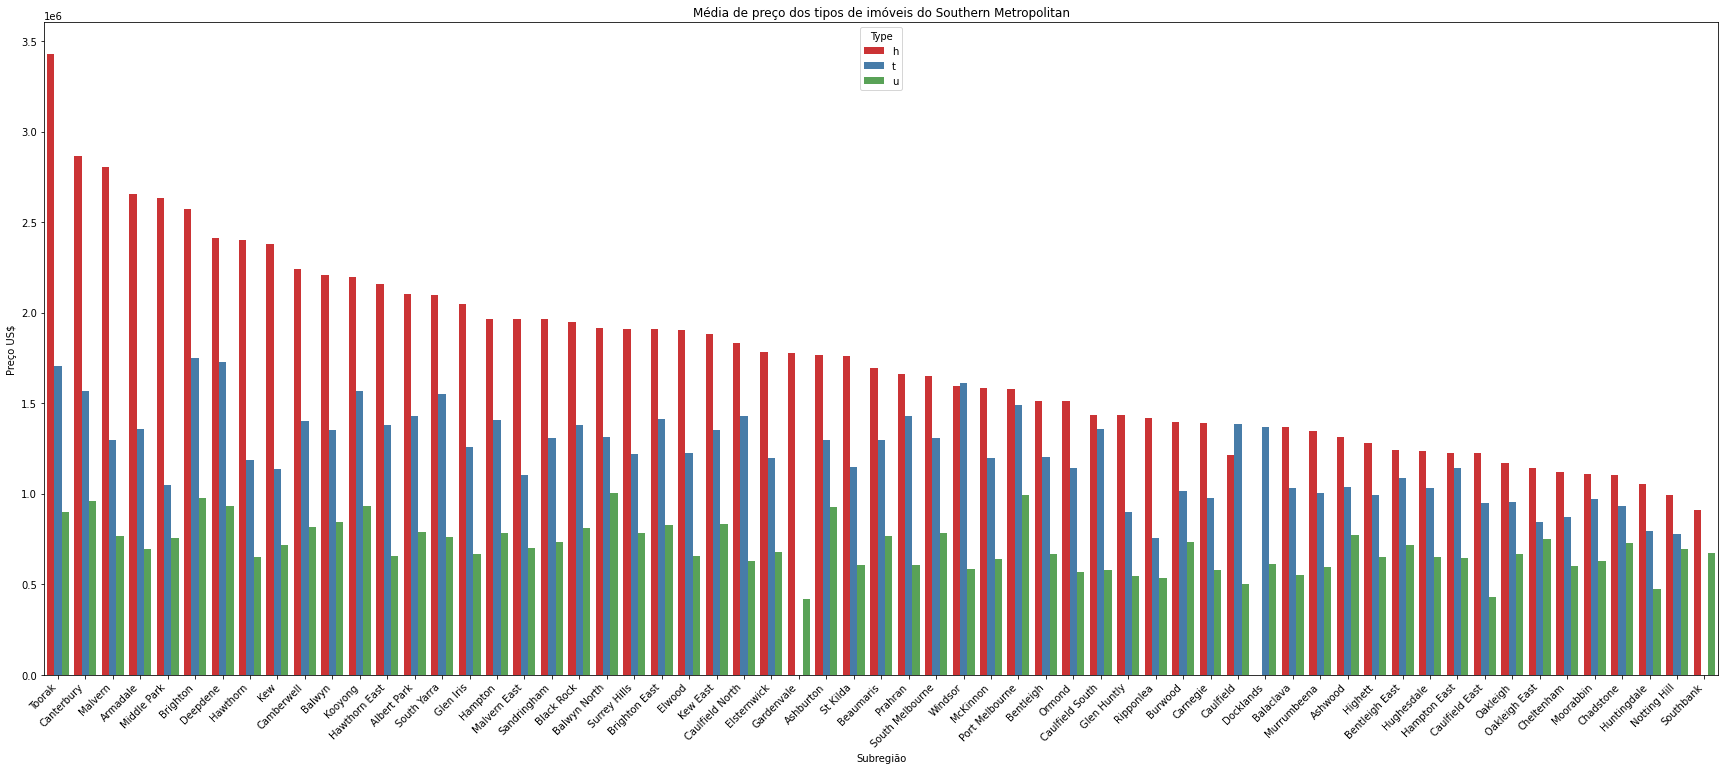

In [ ]:
plt.figure(figsize=(30,12))
sns.barplot(data=df_sm_t, x="Suburb", y="Média", hue="Type", palette="Set1")
plt.title("Média de preço dos tipos de imóveis do Southern Metropolitan")
plt.xlabel("Subregião")
plt.ylabel("Preço US$")
plt.xticks(rotation=45, ha="right");

###**Onde fica o imóvel mais caro dentre todos estes bairros da Southern-Metropolitan e qual o seu preço?**

**O imóvel mais caro fica no bairro de Brighton que é o 6º na média geral dos preços (como vimos anteriormente).**

**Dados do imóvel:**

In [ ]:
df_imo_caro = df_sm["Price"].max()
df_sm[df_sm["Price"] == df_imo_caro]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,mes,ano
59166,Brighton,Cole St,4,h,11200000.0,VB,hockingstuart,2017-10-28,3186,Southern Metropolitan,10579,10.5,Bayside City Council,10,2017


## **Qual o imóvel mais caro da cidade Melbourne?Vamos pegar todas as suas informações.**

**Por coincidência é o imóvel mais caro de Southern Metropolitan como vimos anteriormente.**

In [12]:
df_imo_mel = df["Price"].max()
df[df["Price"] == df_imo_mel]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,mes,ano
59166,Brighton,Cole St,4,h,11200000.0,VB,hockingstuart,2017-10-28,3186,Southern Metropolitan,10579,10.5,Bayside City Council,10,2017


In [13]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,mes,ano
0,Abbotsford,Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1,2017
1,Abbotsford,Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1,2017
2,Abbotsford,Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1,2017
3,Aberfeldie,Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,1,2017
4,Airport West,Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,1,2017
